We start with a simple polynomial in order to verify that our methods work

In [30]:
def simple_poly(x):
    return 4 - 3*x + 2 * x**2

In [31]:
from Gradients import Gradients

## Gradient descent with constant learning rate

In [32]:
from Schedules import Constant
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2023)

__Calibrating the learning rate__

Using the analytical derivative

/Users/augustfemtehjell/opt/miniconda3/envs/fysstk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/augustfemtehjell/Documents/Høst23/FYSSTK/Project2/src/Gradients.py:123: RuntimeWarning: overflow encountered in square
  return 1 / self.n * np.sum((y - X @ theta) ** 2)
/Users/augustfemtehjell/Documents/Høst23/FYSSTK/Project2/src/Gradients.py:123: RuntimeWarning: overflow encountered in matmul
  return 1 / self.n * np.sum((y - X @ theta) ** 2)
/Users/augustfemtehjell/Documents/Høst23/FYSSTK/Project2/src/Gradients.py:139: RuntimeWarning: overflow encountered in matmul
  return 2.0 / self.n * X.T @ ((X @ theta) - y)
/Users/augustfemtehjell/Documents/Høst23/FYSSTK/Project2/src/Gradients.py:139: RuntimeWarning: invalid value encountered in matmul
  return 2.0 / self.n * X.T @ ((X @ theta) - y)


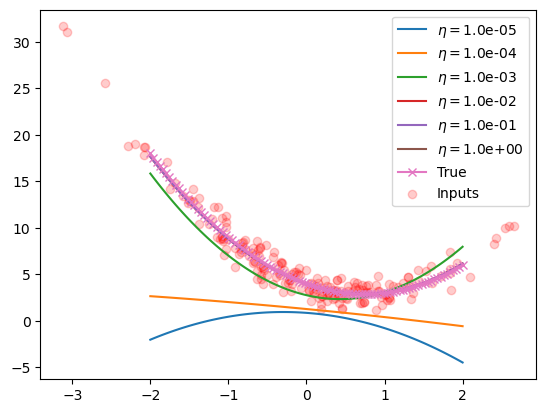

In [33]:
n_epochs = 400
n = 200
x_vals = np.random.randn(n)
y_vals = simple_poly(x_vals) + np.random.randn(n)
etas = np.logspace(-5, 0, 6, dtype=np.float64)
theta = np.random.randn(3)

xnew = np.linspace(-2, 2, 100)

thetas = []
errors = []
base_theta = np.random.randn(3)

for eta in etas:
    scheduler = Constant(eta)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.GradientDescent(base_theta, n_epochs)
    thetas.append(theta)
    errors.append(Gradient.errors)

for eta, theta in zip(etas, thetas):
    ynew = Gradient.predict(xnew, theta)
    plt.plot(xnew, ynew, label=rf"$\eta=${eta:.1e}")

plt.plot(xnew, simple_poly(xnew), "x-", label="True")
plt.scatter(x_vals, y_vals, color="r", label="Inputs", alpha=0.2)
plt.legend()
plt.show()

In [34]:
n_points = 75
theta_arr = np.zeros((n_points, 3))
error_arr = np.zeros((n_points, n_epochs))
eta_arr = np.logspace(-5, -0.75, n_points)

for i, eta in enumerate(eta_arr):
    scheduler = Constant(eta)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.GradientDescent(base_theta, n_epochs)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors

## $\theta$ as a function of $\eta$

As we see below, our predicted parameters $\theta$ are highly dependent on our choice of $\eta$. The plot is cutoff, as too high values of $\eta$ causes overflow.

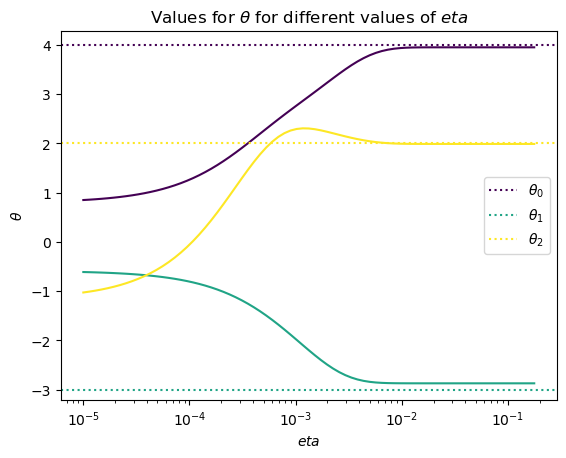

In [35]:
from plotutils import plotThetas

plotThetas(theta_arr, eta_arr, variable_type="log", true_theta=[4, -3, 2])

In [36]:
def predict_per_theta(theta_arr):
    ynew_vals = np.zeros((len(theta_arr), 100))

    for i, theta in enumerate(theta_arr):
        ynew = Gradient.predict(xnew, theta)
        ynew_vals[i] = ynew
    
    return ynew_vals


To get a more visual understanding of how $\eta$ effects the resulting predictions, I have genereted the plot below. Here we see that the higher values of $\eta$ place us closer to the true line, marked with dots.

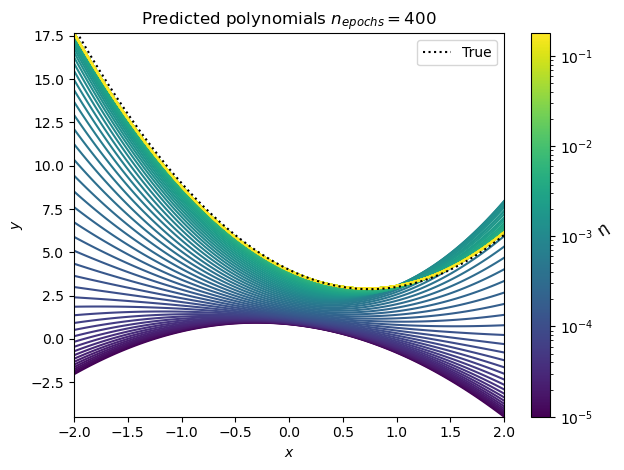

In [37]:
from plotutils import PlotPredictionPerVariable

ynew_vals = predict_per_theta(theta_arr)
PlotPredictionPerVariable(xnew, ynew_vals, eta_arr, target_func=simple_poly, n_epochs=n_epochs)

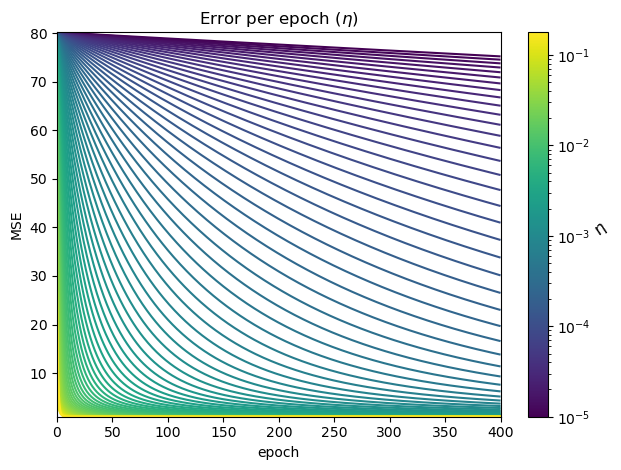

In [38]:
from plotutils import PlotErrorPerVariable

PlotErrorPerVariable(error_arr, eta_arr)

# Adding momentum

In [39]:
from Schedules import Momentum

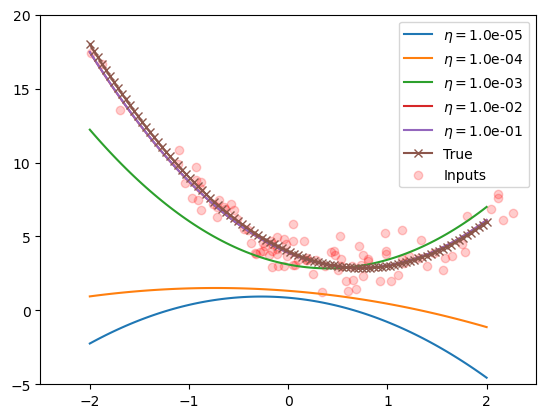

In [40]:
n_epochs = 500
n = 100
x_vals = np.random.randn(n)
y_vals = simple_poly(x_vals) + np.random.randn(n)
etas = np.logspace(-5, -1, 5, dtype=np.float64)
theta = np.random.randn(3)

xnew = np.linspace(-2, 2, n)

thetas = []
error_arr = []

for eta in etas:
    scheduler = Momentum(eta, 0.1)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.GradientDescent(base_theta, n_epochs)
    thetas.append(theta)
    error_arr.append(Gradient.errors)

for eta, theta in zip(etas, thetas):
    ynew = Gradient.predict(xnew, theta)
    plt.plot(xnew, ynew, label=rf"$\eta=${eta:.1e}")

plt.plot(xnew, simple_poly(xnew), "x-", label="True")
plt.scatter(x_vals, y_vals, color="r", label="Inputs", alpha=0.2)
plt.ylim(-5, 20)
plt.xlim(-2.5, 2.5)
plt.legend()
plt.show()

In [41]:
theta_arr = np.zeros((n_points, 3))
error_arr = np.zeros((n_points, n_epochs))

moment_arr = np.linspace(1/n_points, 1, n_points)

for i, moment in enumerate(moment_arr):
    scheduler = Momentum(0.001, moment)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.GradientDescent(base_theta, n_epochs)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors


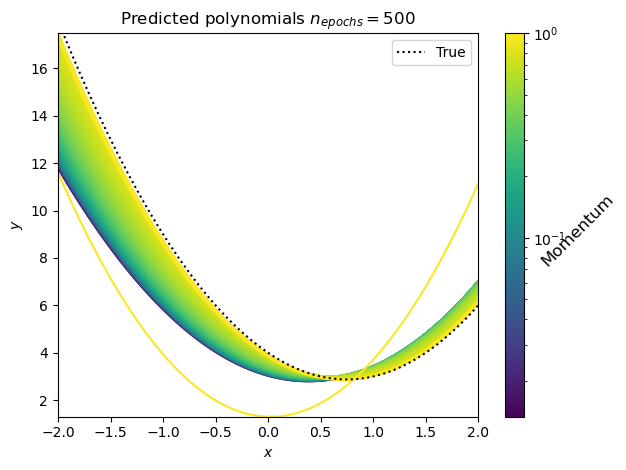

In [42]:
ynew_vals = predict_per_theta(theta_arr)
PlotPredictionPerVariable(xnew, ynew_vals, moment_arr, target_func=simple_poly, n_epochs=n_epochs, variable_label="Momentum", variable_type="log")

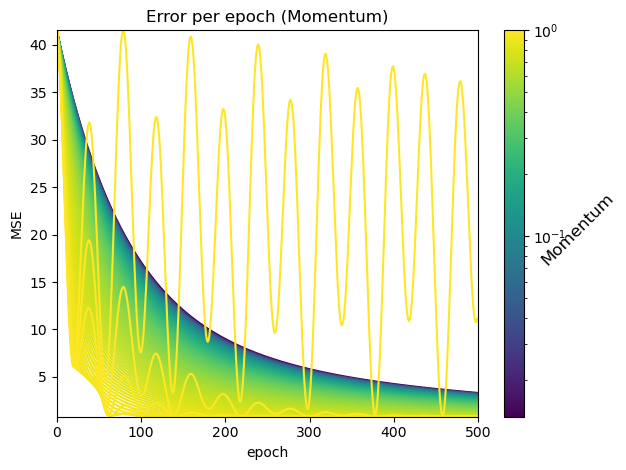

In [43]:
PlotErrorPerVariable(error_arr, moment_arr, variable_label="Momentum", variable_type="log")

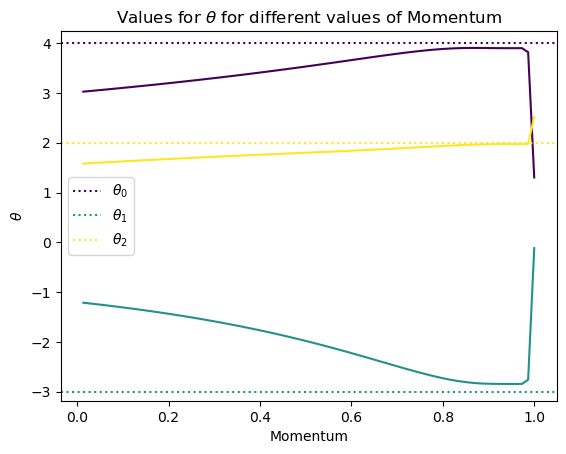

In [44]:
plotThetas(theta_arr, moment_arr, variable_type="linear", true_theta=[4, -3, 2], variable_label="Momentum")

In [45]:
from sklearn.metrics import mean_squared_error
from Schedules import Momentum
from Gradients import Gradients
import numpy as np
from tqdm import tqdm

n_moment = 75
n_eta = 25
moment_arr = np.arctan(np.linspace(0, 10, n_points))
moment_arr = moment_arr / np.max(moment_arr)
eta_arr = np.logspace(-7, -1, n_eta)
xnew = np.linspace(-2, 2, 100)
ynew = simple_poly(xnew)
n_epochs = 500

errors = np.zeros((n_moment, n_eta))
iters = np.zeros((n_moment, n_eta))

pbar = tqdm(total=n_moment * n_eta)
for i, moment in enumerate(moment_arr[::-1]):
    for j, eta in enumerate(eta_arr):
        scheduler = Momentum(eta, moment)
        Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
        theta = Gradient.GradientDescent(base_theta, n_epochs)
        ypred = Gradient.predict(xnew, theta)
        errors[i, j] = mean_squared_error(ynew, ypred)
        pbar.update(1)

250it [01:23,  3.00it/s]


Text(0.5, 1.0, 'Mean squared error')

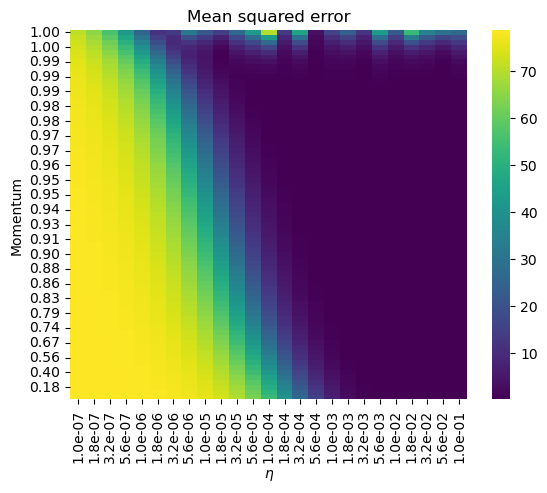

In [46]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(errors, index=[f"{moment:.2f}" for moment in moment_arr[::-1]], columns=[f"{eta:.1e}" for eta in eta_arr])

ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$\eta$")
ax.set_ylabel("Momentum")
ax.set_title("Mean squared error")

In [47]:
from Schedules import TimeDecay

t0 = 1
t1 = 10
# mini_batch_arr = np.asarray([1, 2, 5, 10, 25, 50, 75, 100])
mini_batch_arr = np.arange(1, 101, 1)

theta_arr = np.zeros((len(mini_batch_arr), 3))
error_arr = np.zeros((len(mini_batch_arr), n_epochs))

pbar = tqdm(total=len(mini_batch_arr))

for i, M in enumerate(mini_batch_arr):
    scheduler = TimeDecay(t0, t1, M)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.StochasticGradientDescent(base_theta, n_epochs, M)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors
    pbar.update(1)

 99%|█████████▉| 99/100 [00:02<00:00, 103.61it/s]

Text(0.5, 1.0, 'Mean squared error')

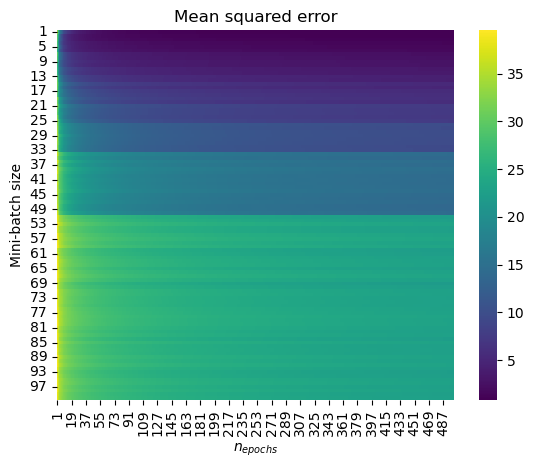

In [48]:
df = pd.DataFrame(error_arr, index=mini_batch_arr, columns=np.arange(1, n_epochs + 1))
ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$n_{epochs}$")
ax.set_ylabel(r"Mini-batch size")
ax.set_title("Mean squared error")

It is interesting to note that we see bands along the nearest integers of fractions of the total number of points.

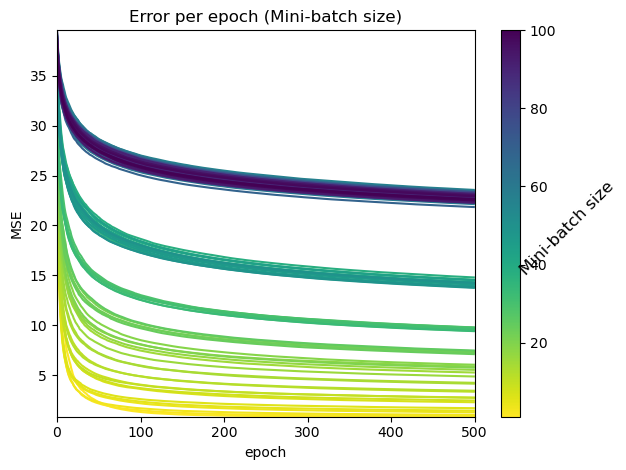

In [49]:
PlotErrorPerVariable(error_arr, mini_batch_arr, variable_label="Mini-batch size", variable_type="linear", colormap="viridis_r")

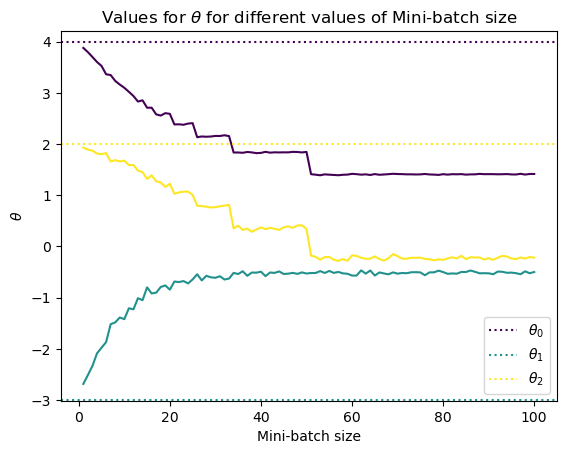

In [50]:
plotThetas(theta_arr, mini_batch_arr, variable_type="linear", true_theta=[4, -3, 2], variable_label="Mini-batch size", colormap="viridis")

In [51]:
from Schedules import Adagrad

mini_batch_arr = np.arange(1, 101, 1)

theta_arr = np.zeros((len(mini_batch_arr), 3))
error_arr = np.zeros((len(mini_batch_arr), n_epochs))

pbar = tqdm(total=len(mini_batch_arr))

for i, M in enumerate(mini_batch_arr):
    scheduler = Adagrad(0.01)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.StochasticGradientDescent(base_theta, n_epochs, M)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors
    pbar.update(1)

100%|██████████| 100/100 [00:03<00:00, 29.60it/s]


Text(0.5, 1.0, 'Mean squared error')

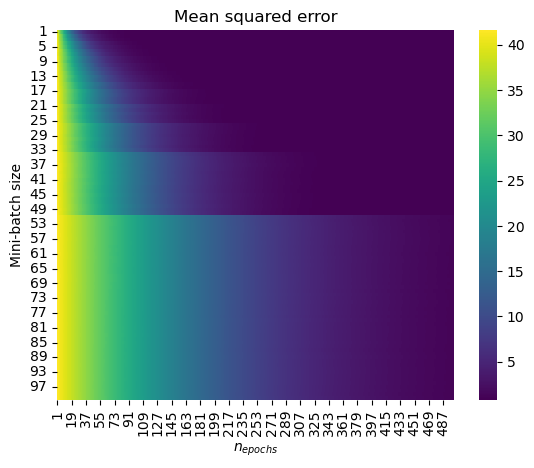

In [52]:
df = pd.DataFrame(error_arr, index=mini_batch_arr, columns=np.arange(1, n_epochs + 1))
ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$n_{epochs}$")
ax.set_ylabel(r"Mini-batch size")
ax.set_title("Mean squared error")

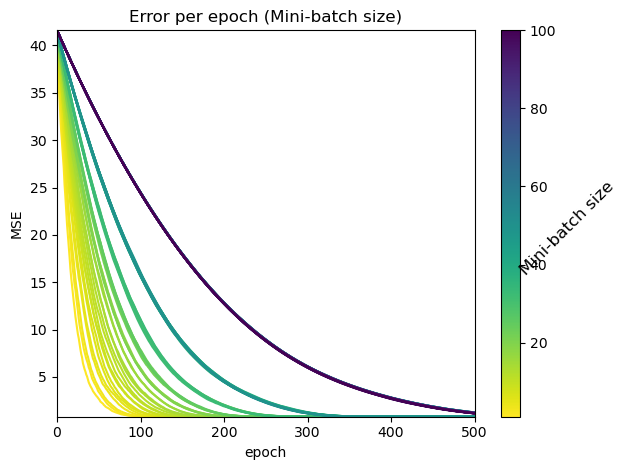

In [53]:
PlotErrorPerVariable(error_arr, mini_batch_arr, variable_label="Mini-batch size", variable_type="linear", colormap="viridis_r")

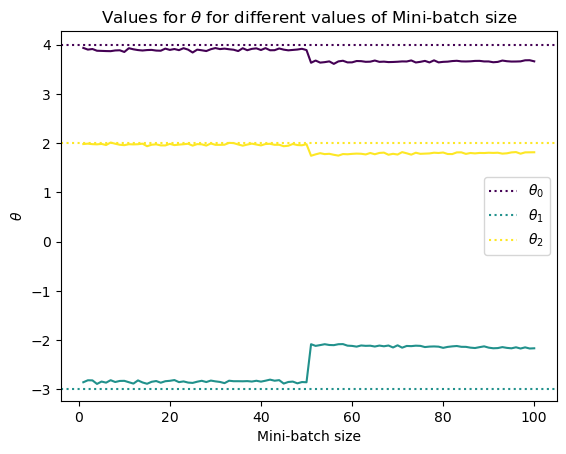

In [54]:
plotThetas(theta_arr, mini_batch_arr, variable_type="linear", true_theta=[4, -3, 2], variable_label="Mini-batch size", colormap="viridis")

In [55]:
from Schedules import Adagrad

eta_arr = np.logspace(-4, -1, 250)
theta_arr = np.zeros((len(eta_arr), 3))
error_arr = np.zeros((len(eta_arr), n_epochs))

pbar = tqdm(total=len(mini_batch_arr))

for i, eta in enumerate(eta_arr):
    scheduler = Adagrad(eta)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.StochasticGradientDescent(base_theta, n_epochs, 20)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors
    pbar.update(1)

100%|██████████| 100/100 [00:04<00:00, 20.11it/s]
248it [00:10, 22.67it/s]                        

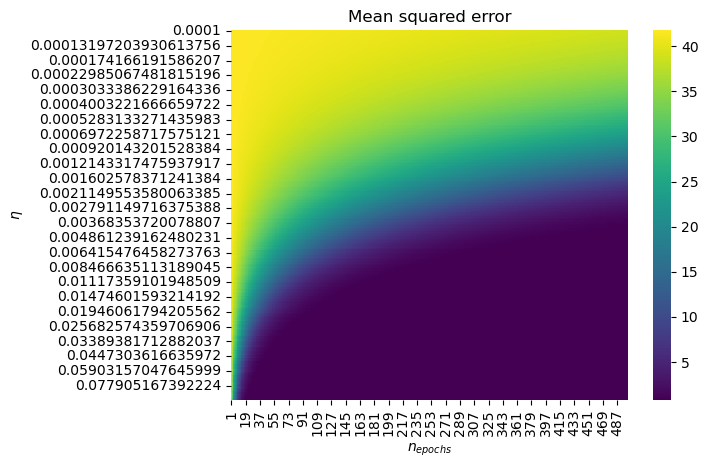

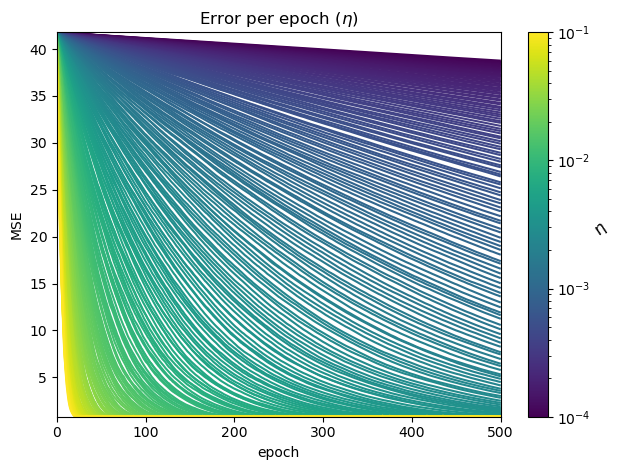

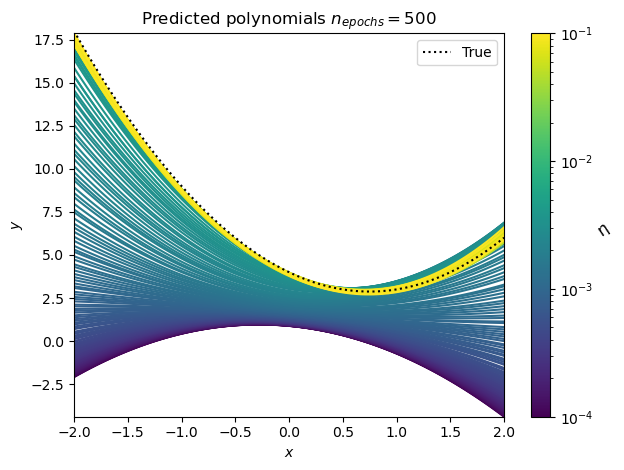

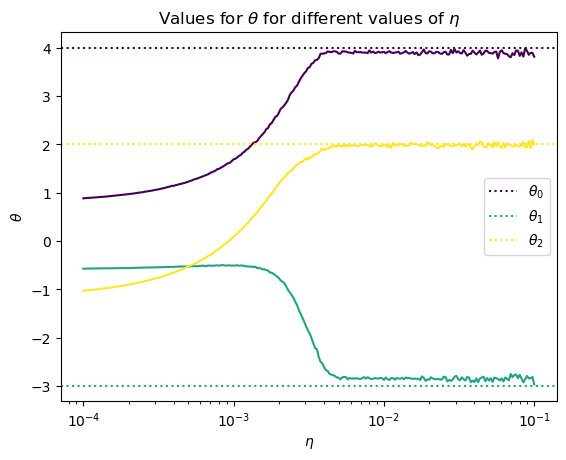

In [56]:
df = pd.DataFrame(error_arr, index=eta_arr, columns=np.arange(1, n_epochs + 1))
ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$n_{epochs}$")
ax.set_ylabel(r"$\eta$")
ax.set_title("Mean squared error")

PlotErrorPerVariable(error_arr, eta_arr, variable_label=r"$\eta$", variable_type="log", colormap="viridis")
PlotPredictionPerVariable(xnew, predict_per_theta(theta_arr), eta_arr, target_func=simple_poly, n_epochs=n_epochs, variable_label=r"$\eta$", variable_type="log")
plotThetas(theta_arr, eta_arr, variable_type="log", true_theta=[4, -3, 2], variable_label=r"$\eta$", colormap="viridis")

In [57]:
from Schedules import AdagradMomentum

eta_arr = np.logspace(-4, -1, 250)
theta_arr = np.zeros((len(eta_arr), 3))
error_arr = np.zeros((len(eta_arr), n_epochs))

pbar = tqdm(total=len(mini_batch_arr))

for i, eta in enumerate(eta_arr):
    scheduler = AdagradMomentum(eta, 0.9)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.StochasticGradientDescent(base_theta, n_epochs, 20)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors
    pbar.update(1)

250it [00:11, 21.00it/s]


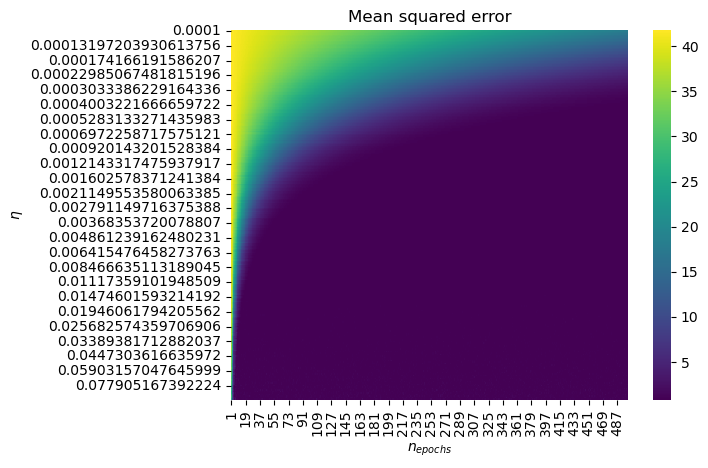

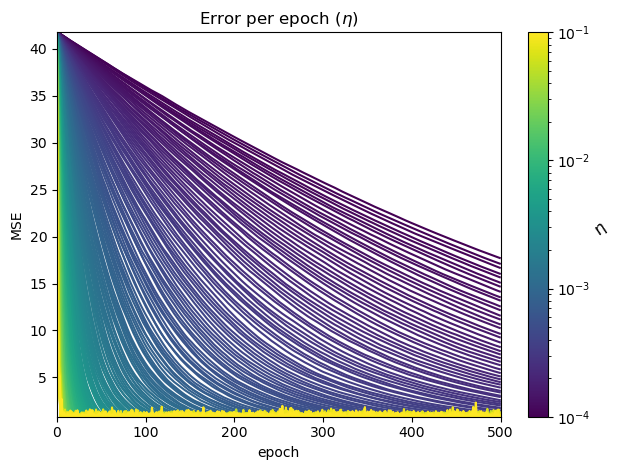

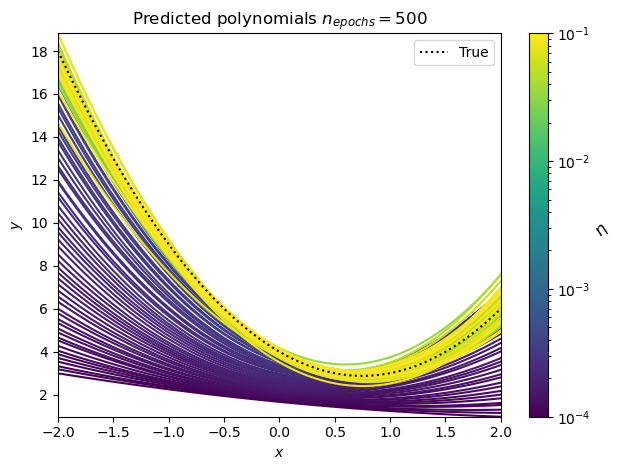

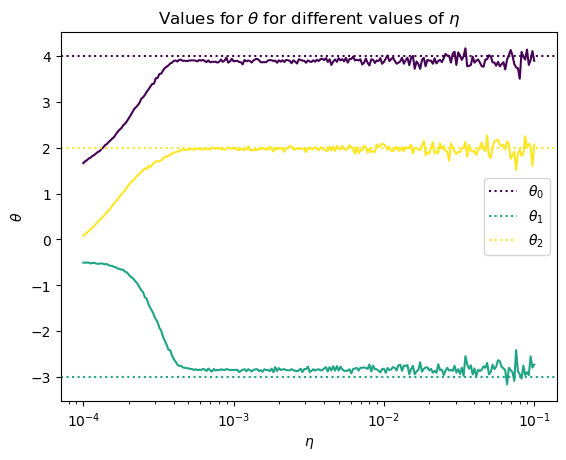

In [58]:
df = pd.DataFrame(error_arr, index=eta_arr, columns=np.arange(1, n_epochs + 1))
ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$n_{epochs}$")
ax.set_ylabel(r"$\eta$")
ax.set_title("Mean squared error")

PlotErrorPerVariable(error_arr, eta_arr, variable_label=r"$\eta$", variable_type="log", colormap="viridis")
PlotPredictionPerVariable(xnew, predict_per_theta(theta_arr), eta_arr, target_func=simple_poly, n_epochs=n_epochs, variable_label=r"$\eta$", variable_type="log")
plotThetas(theta_arr, eta_arr, variable_type="log", true_theta=[4, -3, 2], variable_label=r"$\eta$", colormap="viridis")

In [59]:
from Schedules import RMS_prop

eta_arr = np.logspace(-4, -1, 250)
theta_arr = np.zeros((len(eta_arr), 3))
error_arr = np.zeros((len(eta_arr), n_epochs))

pbar = tqdm(total=len(mini_batch_arr))

for i, eta in enumerate(eta_arr):
    scheduler = RMS_prop(eta, 0.9)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.StochasticGradientDescent(base_theta, n_epochs, 20)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors
    pbar.update(1)

250it [03:19,  1.25it/s]00:00<?, ?it/s]
249it [00:09, 27.38it/s]                        

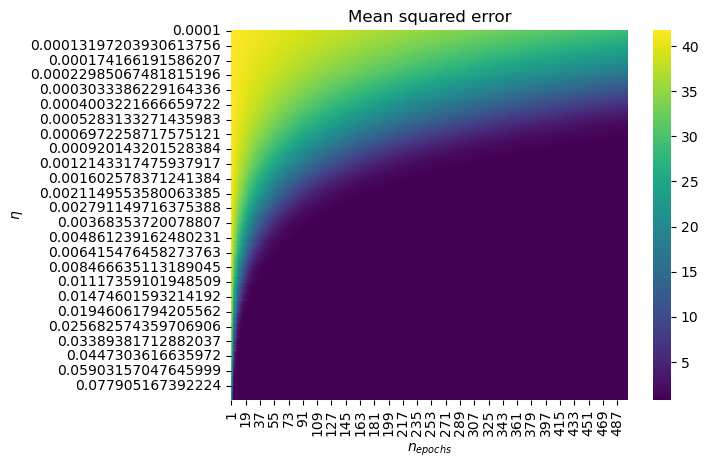

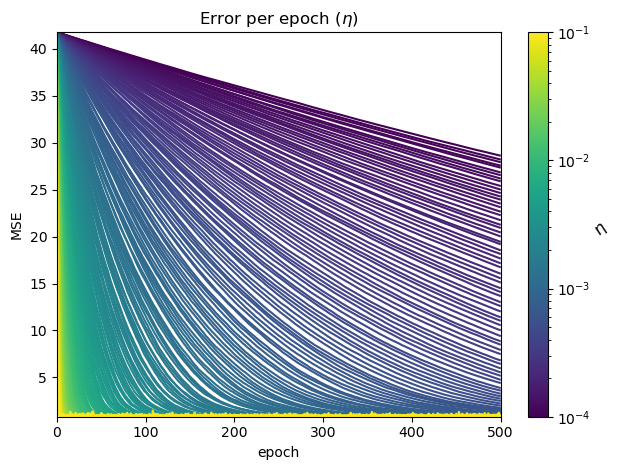

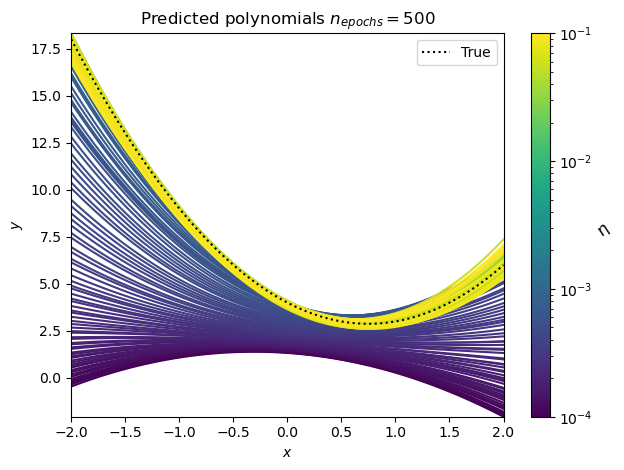

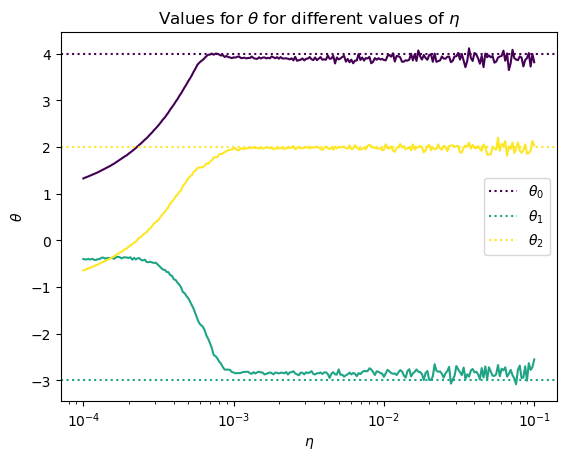

250it [00:20, 27.38it/s]

In [60]:
df = pd.DataFrame(error_arr, index=eta_arr, columns=np.arange(1, n_epochs + 1))
ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$n_{epochs}$")
ax.set_ylabel(r"$\eta$")
ax.set_title("Mean squared error")

PlotErrorPerVariable(error_arr, eta_arr, variable_label=r"$\eta$", variable_type="log", colormap="viridis")
PlotPredictionPerVariable(xnew, predict_per_theta(theta_arr), eta_arr, target_func=simple_poly, n_epochs=n_epochs, variable_label=r"$\eta$", variable_type="log")
plotThetas(theta_arr, eta_arr, variable_type="log", true_theta=[4, -3, 2], variable_label=r"$\eta$", colormap="viridis")

In [61]:
from Schedules import Adam

eta_arr = np.logspace(-4, -1, 250)
theta_arr = np.zeros((len(eta_arr), 3))
error_arr = np.zeros((len(eta_arr), n_epochs))

pbar = tqdm(total=len(mini_batch_arr))

for i, eta in enumerate(eta_arr):
    scheduler = Adam(eta, 0.9, 0.999)
    Gradient = Gradients(n, x_vals, y_vals, model="OLS", method="analytic", scheduler=scheduler)
    theta = Gradient.StochasticGradientDescent(base_theta, n_epochs, 20)
    theta_arr[i, :] = theta
    error_arr[i, :] = Gradient.errors
    pbar.update(1)

250it [01:03,  3.96it/s]


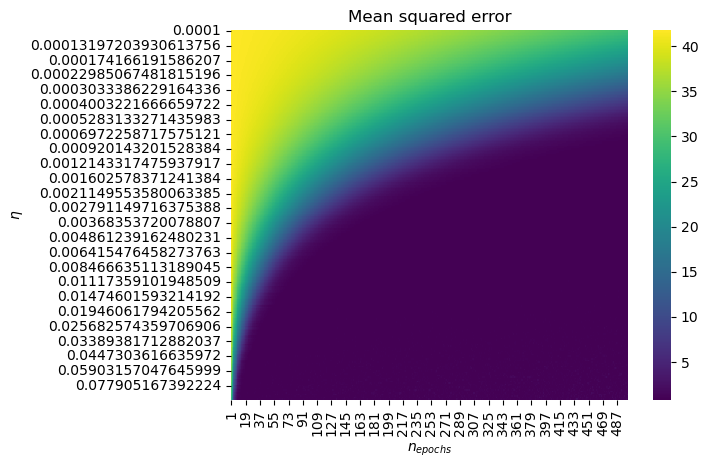

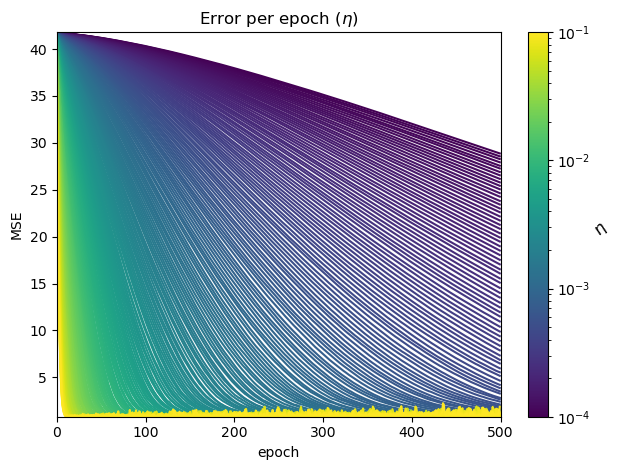

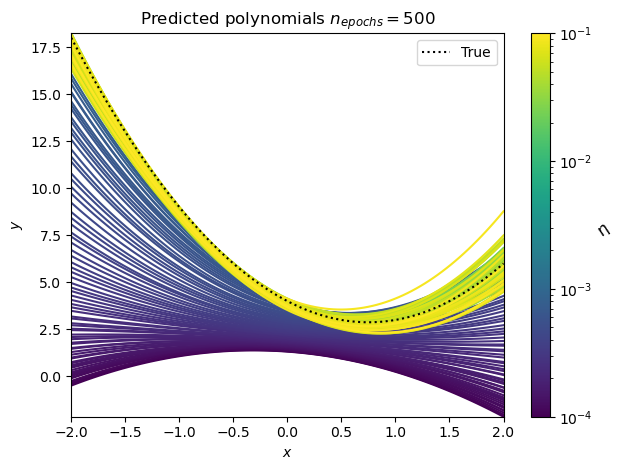

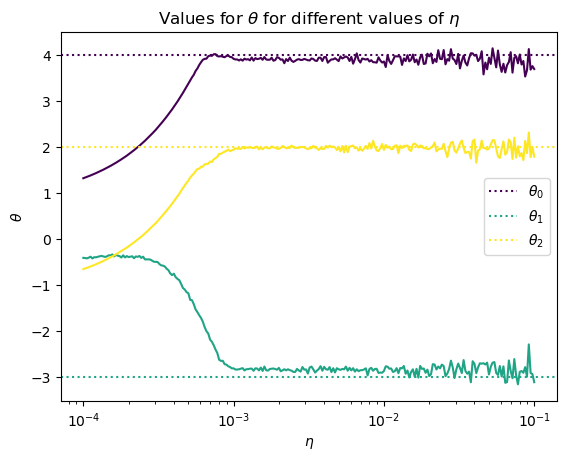

In [62]:
df = pd.DataFrame(error_arr, index=eta_arr, columns=np.arange(1, n_epochs + 1))
ax = sns.heatmap(df, cmap="viridis")
ax.set_xlabel(r"$n_{epochs}$")
ax.set_ylabel(r"$\eta$")
ax.set_title("Mean squared error")

PlotErrorPerVariable(error_arr, eta_arr, variable_label=r"$\eta$", variable_type="log", colormap="viridis")
PlotPredictionPerVariable(xnew, predict_per_theta(theta_arr), eta_arr, target_func=simple_poly, n_epochs=n_epochs, variable_label=r"$\eta$", variable_type="log")
plotThetas(theta_arr, eta_arr, variable_type="log", true_theta=[4, -3, 2], variable_label=r"$\eta$", colormap="viridis")